# 1. Bibliotheken laden

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Daten laden - Update


In [2]:
folder_path = 'C:/Users/michi/OneDrive/MSC DV/Python/Projektarbeit DV/flow'  #Ordnerpfad allenfalls anpassen
data_frames = []

for file in os.listdir(folder_path):
    if file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        data = pd.read_csv(file_path)
        filename = os.path.splitext(file)[0]  #Dateiname
        data['Messstation'] = filename[:3]  #Erste drei Zeichen aus Dateinamen für Messstation
        data_frames.append(data)

flow_data = pd.concat(data_frames, ignore_index=True) #enthält  die aggregierten Daten mit der zusätzlichen Information "Messtation" in der letzten Spalte

#Diesen Code auskommentieren, wenn 0-Werte eingeblendet werden sollen!
#flow_data = flow_data.drop(flow_data[flow_data['measured_value'] == 0].index) #Entferne alle Zeilen, in denen die Spalte "measured_value" den Wert 0 hat
#Grund: Der Wert 0 kommt 1883088 Mal in der Spalte 'measured_value' vor --> Aufblähung der Daten

flow_data = flow_data.drop("id", axis="columns")

In [3]:
flow_data

,index,measurement_time,measured_value,Messstation
0,0,2022-09-11 00:00:00+02,0,025
1,0,2022-09-11 00:15:00+02,0,025
2,0,2022-09-11 00:30:00+02,0,025
3,0,2022-09-11 00:45:00+02,0,025
4,0,2022-09-11 01:00:00+02,0,025
...,...,...,...,...
1668950,0,2023-03-30 16:45:00+02,0,828
1668951,0,2023-03-30 17:00:00+02,0,828
1668952,11,2023-03-31 00:00:00+02,1,828
1668953,21,2023-03-31 00:00:00+02,0,828


In [4]:
#Zähle das Vorkommen eines bestimmten Werts in der Spalte "measured_value"
wert = 0  # gewünschten Wert eingeben
anzahl = flow_data['measured_value'].value_counts()[wert]

print(f"Der Wert {wert} kommt {anzahl} Mal in der Spalte 'measured_value' vor.")

#Historie bevor Adaptierung im Code: Der Wert 0 kommt 1883088 Mal in der Spalte 'measured_value' vor --> Aufblähung der Daten

Der Wert 0 kommt 949315 Mal in der Spalte 'measured_value' vor.


In [5]:
flow_data.dtypes

index                int64
measurement_time    object
measured_value       int64
Messstation         object
dtype: object

# 3. Daten analysieren

In [7]:
flow_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982973 entries, 0 to 982972
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   index             982973 non-null  int64 
 1   measurement_time  982973 non-null  object
 2   measured_value    982973 non-null  int64 
 3   Messstation       982973 non-null  object
dtypes: int64(2), object(2)
memory usage: 30.0+ MB


keine Missings vorhanden

In [55]:
#für numerische Daten
num_missing = flow_data.isna().sum()
num_missing[:10]

index               0
measurement_time    0
measured_value      0
Messstation         0
dtype: int64

keine Missings vorhanden

In [6]:
flow_data.measured_value.min()

0

In [7]:
flow_data.measured_value.max()

1494

In [8]:
number_measured_values = flow_data['measured_value'].value_counts()
print(number_measured_values)

0       949315
1        83383
2        49931
3        34833
4        25425
         ...  
471          1
489          1
458          1
488          1
1137         1
Name: measured_value, Length: 496, dtype: int64


In [9]:
top_10_values = flow_data['measured_value'].nlargest(15) #Zahl anpassen für Top X
print(top_10_values)

592342     1494
248880     1489
1603685    1137
370484     1136
45074      1132
800759     1130
1450159     825
119169      508
180921      507
184971      505
699967      504
119132      498
699968      494
117150      490
115130      489
Name: measured_value, dtype: int64


hilft nicht zwingend weiter --> Analyse auf Ebene Messstation und Kategorie


## Detailanalyse
Ebene Messstation, nur PKW (Kategorie 11)

In [10]:
filtered_data = flow_data[(flow_data['Messstation'] == '025') & (flow_data['index'] == 11)]
top_values = filtered_data['measured_value'].nlargest(15)
print(top_values)

45074     1132
119169     508
180921     507
184971     505
119132     498
117150     490
115130     489
130325     488
119171     485
181189     484
107895     479
117149     479
119170     479
142215     479
142500     479
Name: measured_value, dtype: int64


In [11]:
filtered_data = flow_data[(flow_data['Messstation'] == '132') & (flow_data['index'] == 11)]
top_values = filtered_data['measured_value'].nlargest(15)
print(top_values)

248880    1489
320736     358
234706     357
320731     341
234708     338
320733     333
232460     322
320735     322
219919     321
320734     320
219921     319
309542     318
234709     317
311832     317
219916     316
Name: measured_value, dtype: int64


1 Ausreisser vorhanden

In [15]:
top_10_values = flow_data[flow_data['Messstation'] == '228']['measured_value'].nlargest(15)
print(top_10_values)

689544     1136
1021725    1136
805237      474
805235      472
926265      472
885000      468
958782      467
885001      457
926266      456
874827      453
847027      452
874828      451
930119      451
797448      449
891169      449
Name: measured_value, dtype: int64


2 Ausreisser vorhanden

In [8]:
filtered_data = flow_data[(flow_data['Messstation'] == '245') & (flow_data['index'] == 11)]
top_values = filtered_data['measured_value'].nlargest(15)
print(top_values)

1445973    2243
1134453    1494
1402546     563
1242078     504
1242079     494
1242077     486
1202118     482
1242340     470
1250414     465
1244409     463
1250413     459
1199569     457
1202117     452
1213554     452
1224641     450
Name: measured_value, dtype: int64


2 Ausreisser vorhanden

In [9]:
filtered_data = flow_data[(flow_data['Messstation'] == '318') & (flow_data['index'] == 11)]
top_values = filtered_data['measured_value'].nlargest(15)
print(top_values)

1886945    2237
1549655    1130
1771796     739
1820268     490
1828469     465
1830790     463
1736796     462
1834847     461
1812406     456
1812412     454
1742941     452
1818271     451
1742940     447
1736798     445
1820293     445
Name: measured_value, dtype: int64


2 oder 3 Ausreisser vorhanden

In [13]:
filtered_data = flow_data[(flow_data['Messstation'] == '373') & (flow_data['index'] == 11)]
top_values = filtered_data['measured_value'].nlargest(15)
print(top_values)

1026580    372
1001499    317
1001500    308
1090681    298
1086186    295
987893     291
1083878    285
1083879    278
1010764    277
1025889    276
1086189    267
1010766    265
1083880    265
992549     264
1079562    264
Name: measured_value, dtype: int64


Daten i.O.

In [14]:
filtered_data = flow_data[(flow_data['Messstation'] == '603') & (flow_data['index'] == 11)]
top_values = filtered_data['measured_value'].nlargest(15)
print(top_values)

1217432    448
1292624    418
1303684    417
1309830    417
1292623    414
1216855    413
1217423    411
1217424    410
1309829    410
1217135    406
1303683    405
1292617    403
1222934    402
1315880    402
1217134    401
Name: measured_value, dtype: int64


Daten i.O.

In [12]:
filtered_data = flow_data[(flow_data['Messstation'] == '708') & (flow_data['index'] == 11)]
top_values = filtered_data['measured_value'].nlargest(15)
print(top_values)

2660324    314
2747793    310
2650797    308
2747794    303
2870650    298
2780308    295
2660325    294
2773961    293
2750164    290
2860103    288
2862318    288
2860100    287
2773965    284
2862322    284
2784672    283
Name: measured_value, dtype: int64


Daten i.O.

In [19]:
filtered_data = flow_data[(flow_data['Messstation'] == '828') & (flow_data['index'] == 11)]
top_values = filtered_data['measured_value'].nlargest(15)
print(top_values)

1603685    1137
1450159     825
1660983     392
1572597     391
1660981     358
1664950     346
1664952     343
1589195     341
1650837     338
1637810     336
1654806     331
1654804     330
1666969     327
1662922     326
1514767     325
Name: measured_value, dtype: int64


4 Ausreisser vorhanden

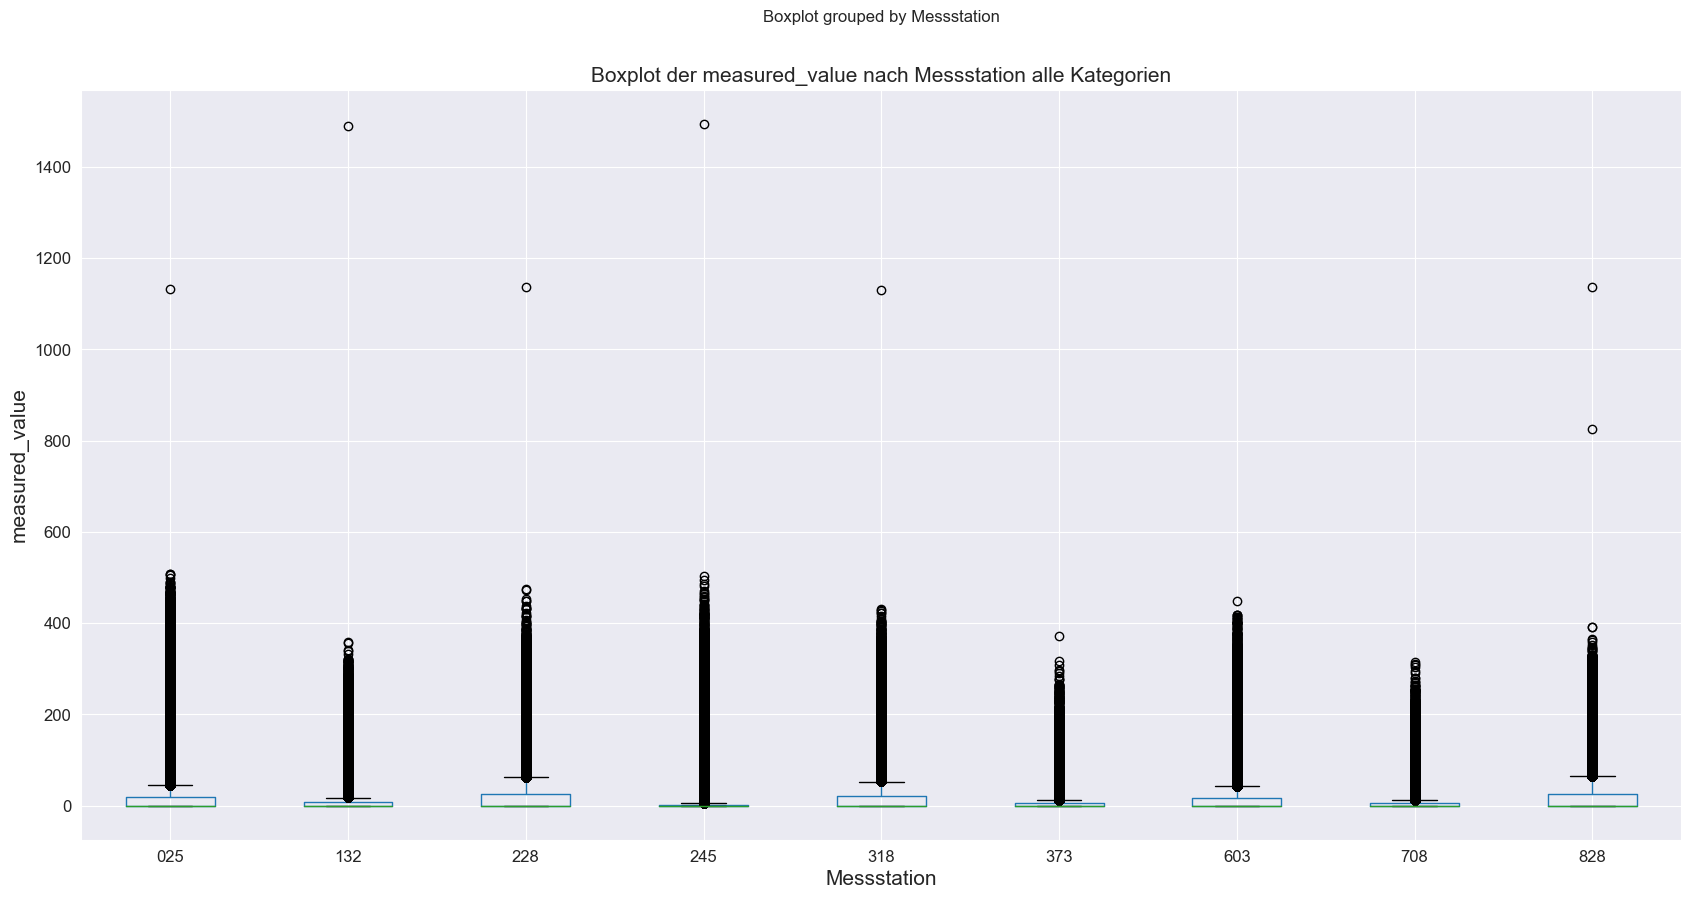

In [12]:
#Boxplot
ax = flow_data.boxplot(column='measured_value', by='Messstation', figsize=(20, 10))

# Erscheinungsbild
plt.title('Boxplot der measured_value nach Messstation alle Kategorien', fontsize=15)
plt.xlabel('Messstation', fontsize=15)
plt.ylabel('measured_value', fontsize=15)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.show()

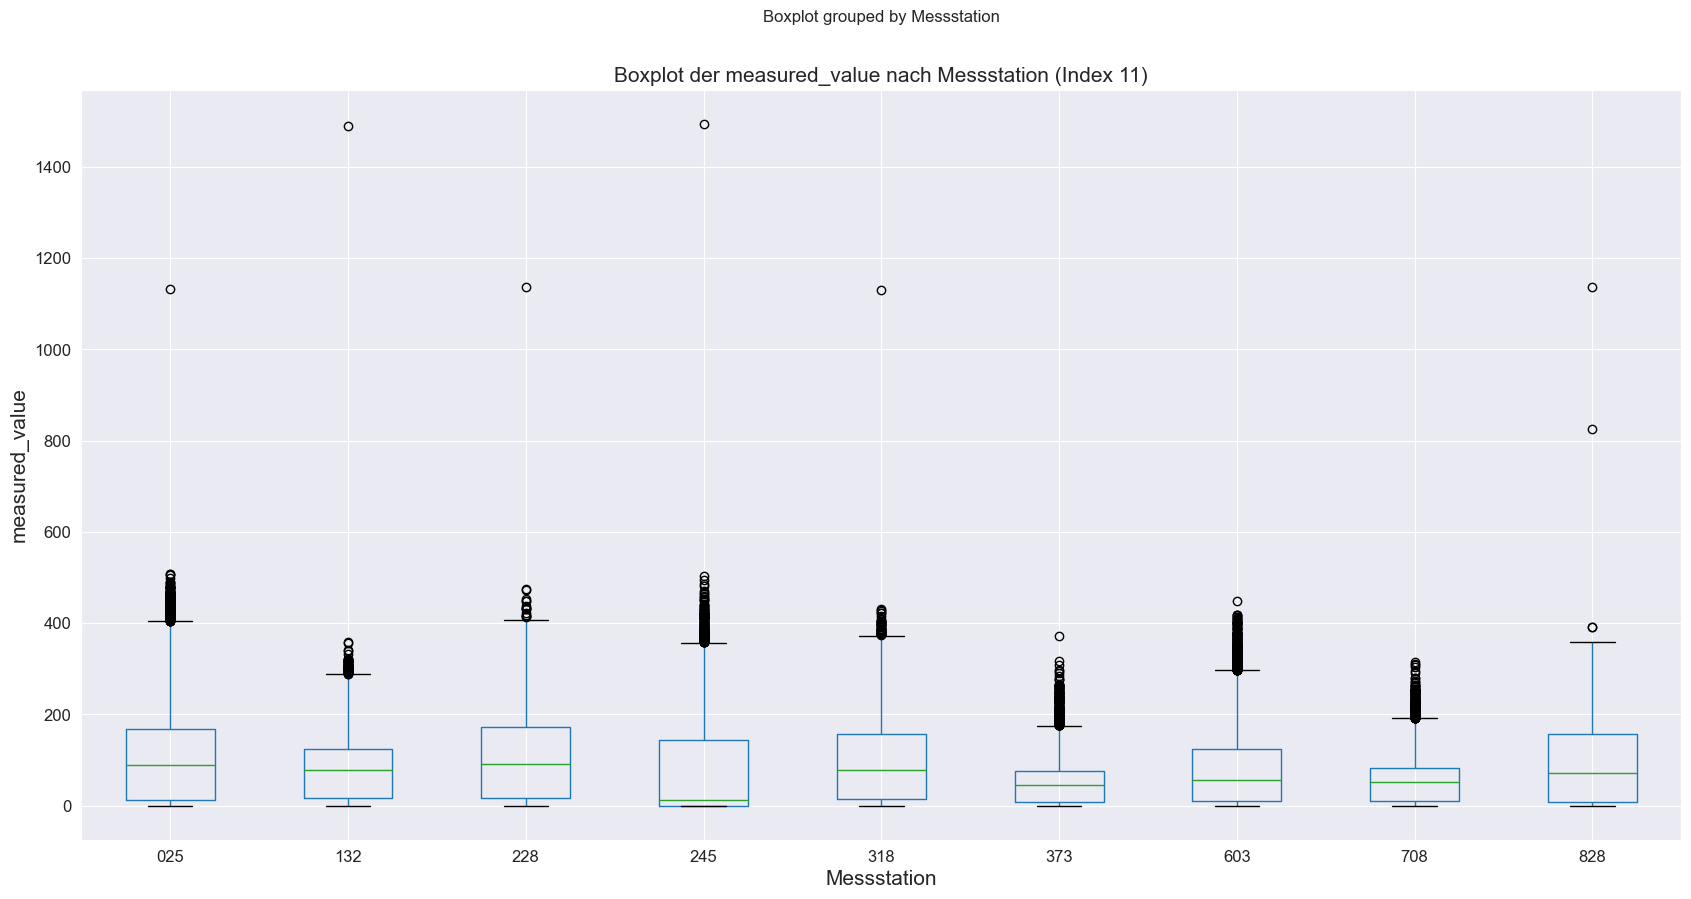

In [15]:
filtered_data = flow_data[flow_data['index'] == 11]

# Boxplot
ax = filtered_data.boxplot(column='measured_value', by='Messstation', figsize=(20, 10))

# Erscheinungsbild
plt.title('Boxplot der measured_value nach Messstation (Index 11)', fontsize=15)
plt.xlabel('Messstation', fontsize=15)
plt.ylabel('measured_value', fontsize=15)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.show()

keine Unterscheidung bei den Ausreissern --> alle in Kategorie 11 PKW

# 4. Data Cleaning

## Was gehört dazu?

* Fehlende Daten (Missing Data)
* Inkonsistente Daten (Schreibfehler, Datenfehler, Adressen, Zahlenformate...)
* Unnötige Daten: Wiederholungen, Duplikate, usw.
* Nicht normgerechte Daten (Ausreisser)

## Warum Data Cleaning?

Wir betreiben datengetriebene Wissenschaft. Damit sind wir vollkommen abhängig von der Qualität unserer Daten.

Bei allen Verfahren, sei es Visualisierung per Dashboard, Machine Learning, Mining usw. gilt das altbekannte Prinzip:

### Garbage in, garbage out

## Analyse der 0-Werte

## Überblick

C:\Users\michi\AppData\Local\Temp\ipykernel_3840\4071949188.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['hour'] = station_data['measurement_time'].dt.hour


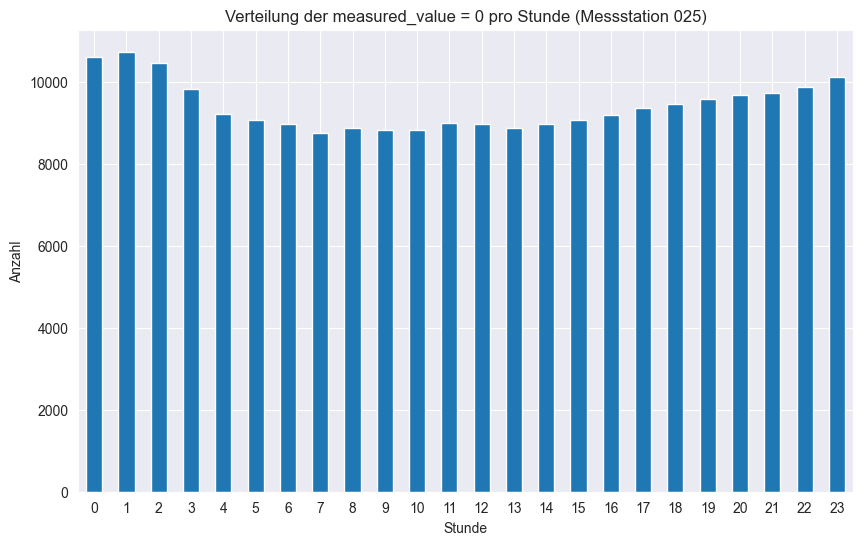

C:\Users\michi\AppData\Local\Temp\ipykernel_3840\4071949188.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['hour'] = station_data['measurement_time'].dt.hour


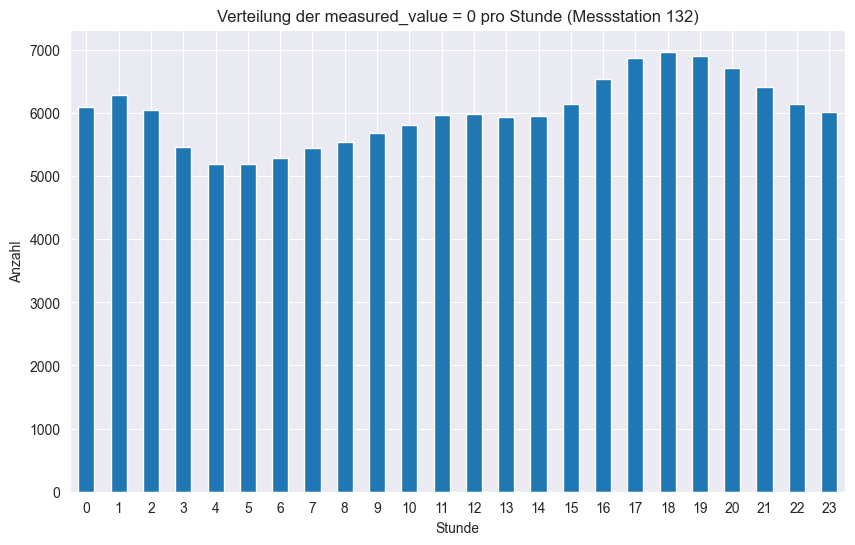

C:\Users\michi\AppData\Local\Temp\ipykernel_3840\4071949188.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['hour'] = station_data['measurement_time'].dt.hour


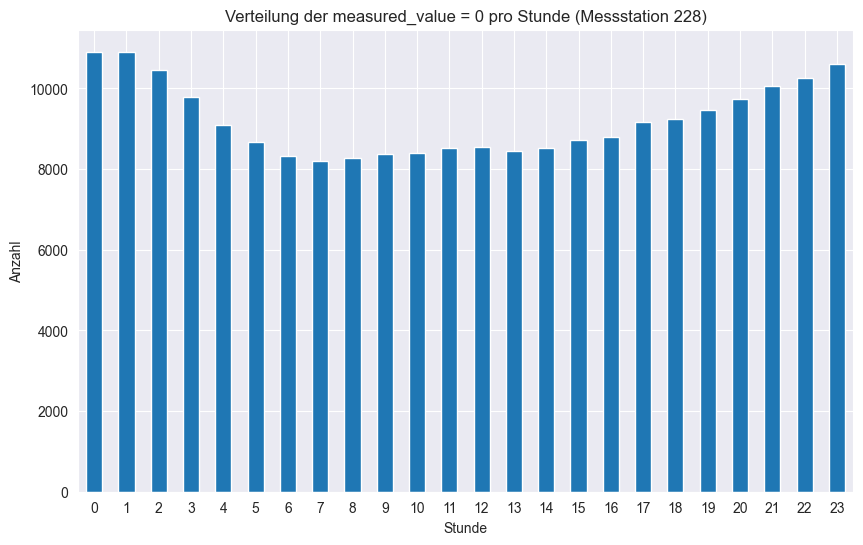

C:\Users\michi\AppData\Local\Temp\ipykernel_3840\4071949188.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['hour'] = station_data['measurement_time'].dt.hour


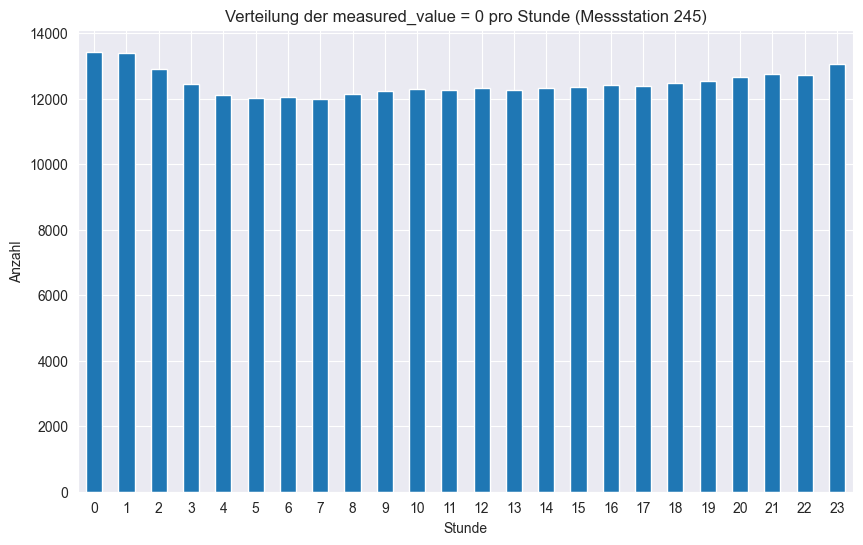

C:\Users\michi\AppData\Local\Temp\ipykernel_3840\4071949188.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['hour'] = station_data['measurement_time'].dt.hour


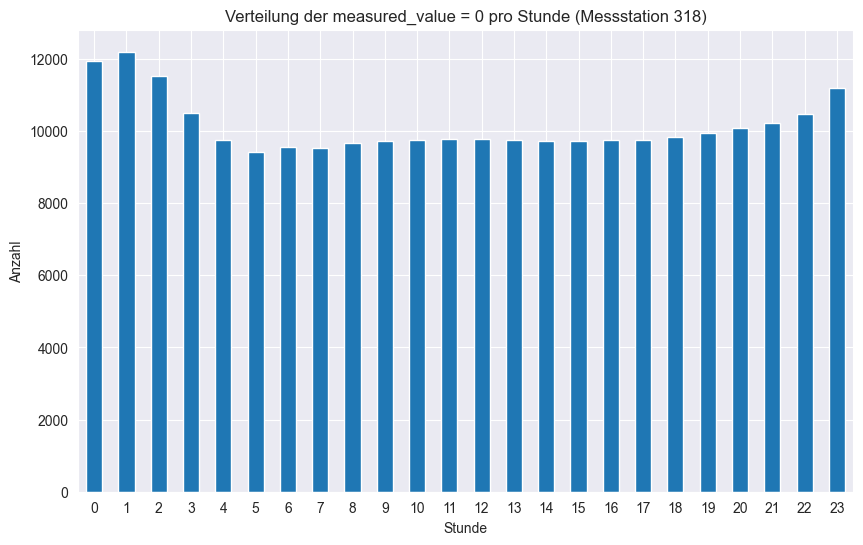

C:\Users\michi\AppData\Local\Temp\ipykernel_3840\4071949188.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['hour'] = station_data['measurement_time'].dt.hour


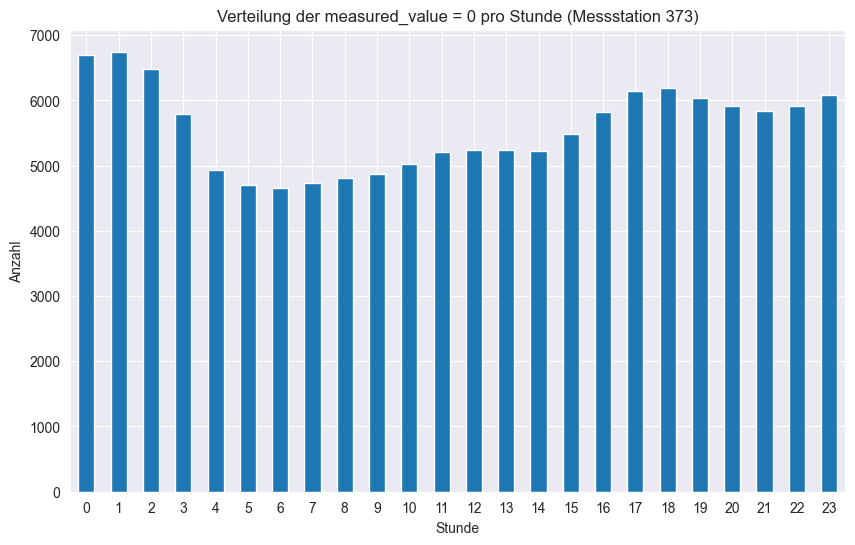

C:\Users\michi\AppData\Local\Temp\ipykernel_3840\4071949188.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['hour'] = station_data['measurement_time'].dt.hour


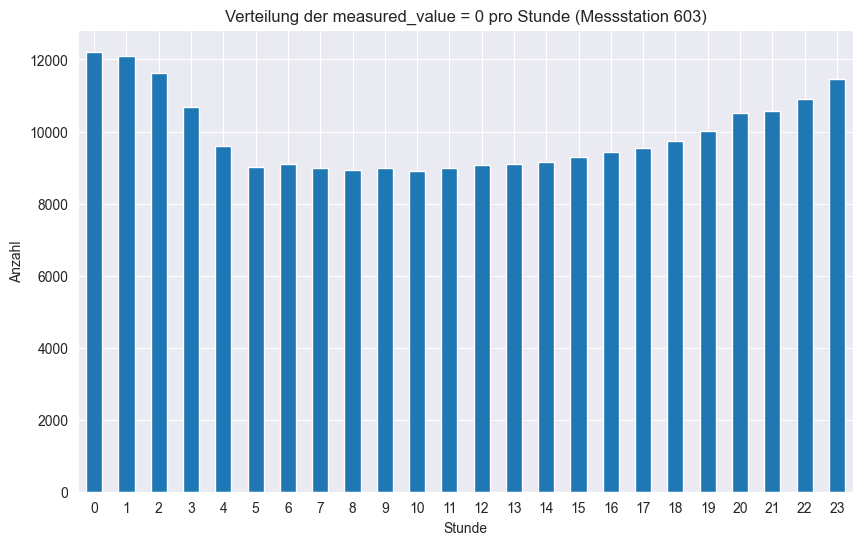

C:\Users\michi\AppData\Local\Temp\ipykernel_3840\4071949188.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['hour'] = station_data['measurement_time'].dt.hour


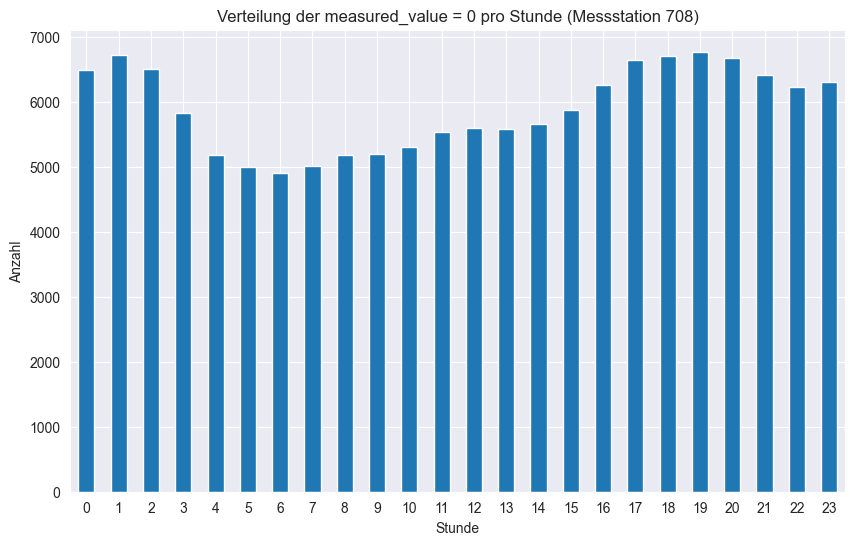

C:\Users\michi\AppData\Local\Temp\ipykernel_3840\4071949188.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['hour'] = station_data['measurement_time'].dt.hour


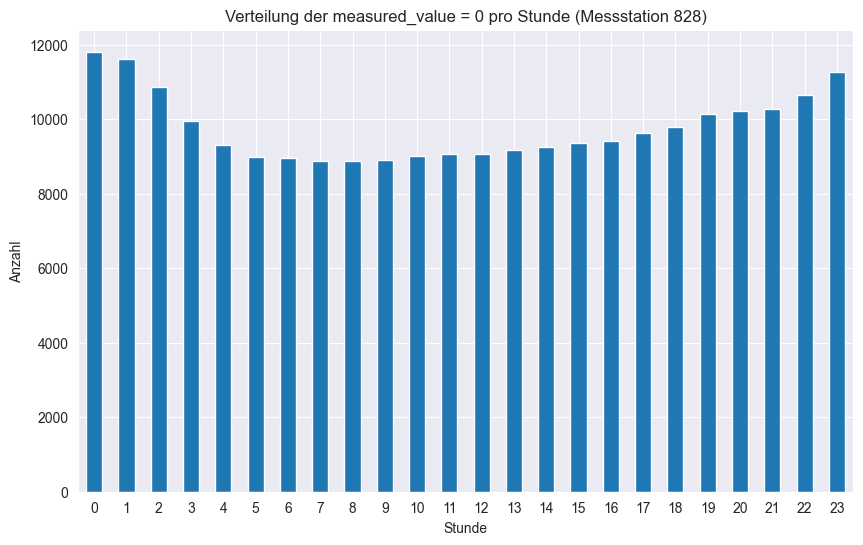

In [73]:
flow_data['measurement_time'] = pd.to_datetime(flow_data['measurement_time'], format='%Y-%m-%d %H:%M:%S%z', utc=True)

# Filtere die Daten für den Wert 0 in der Spalte "measured_value"
zero_values = flow_data[flow_data['measured_value'] == 0]

# Iteriere über jede eindeutige "Messstation"
for station in zero_values['Messstation'].unique():
    # Filtere die Daten für die aktuelle "Messstation"
    station_data = zero_values[zero_values['Messstation'] == station]

    # Extrahiere die Stunden aus der Spalte "measurement_time"
    station_data['hour'] = station_data['measurement_time'].dt.hour

    # Zähle die Anzahl der Nullwerte pro Stunde
    count_per_hour = station_data['hour'].value_counts().sort_index()

    # Erstelle ein Bar-Diagramm zur Darstellung der Verteilung pro Stunde
    count_per_hour.plot(kind='bar', figsize=(10, 6))

    # Passe das Erscheinungsbild des Diagramms an
    plt.title(f'Verteilung der measured_value = 0 pro Stunde (Messstation {station})')
    plt.xlabel('Stunde')
    plt.ylabel('Anzahl')
    plt.xticks(rotation=0)

    # Zeige das Diagramm an
    plt.show()

## Index 11 (PKW)

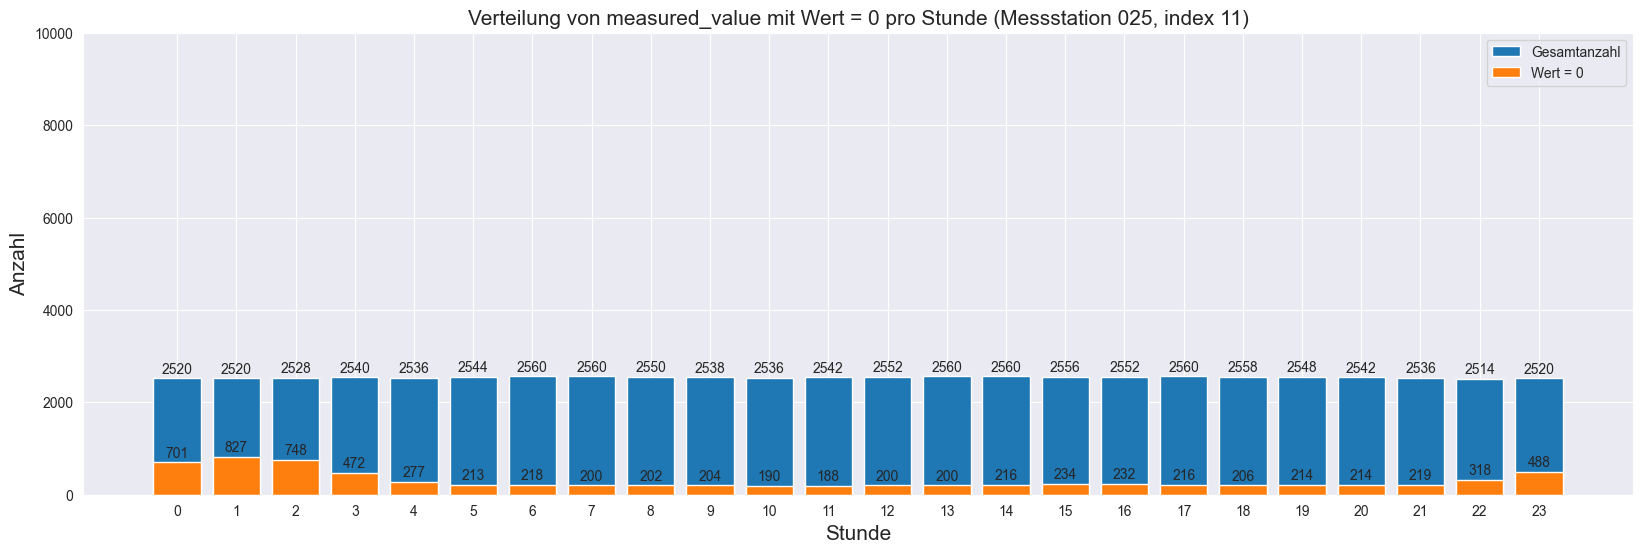

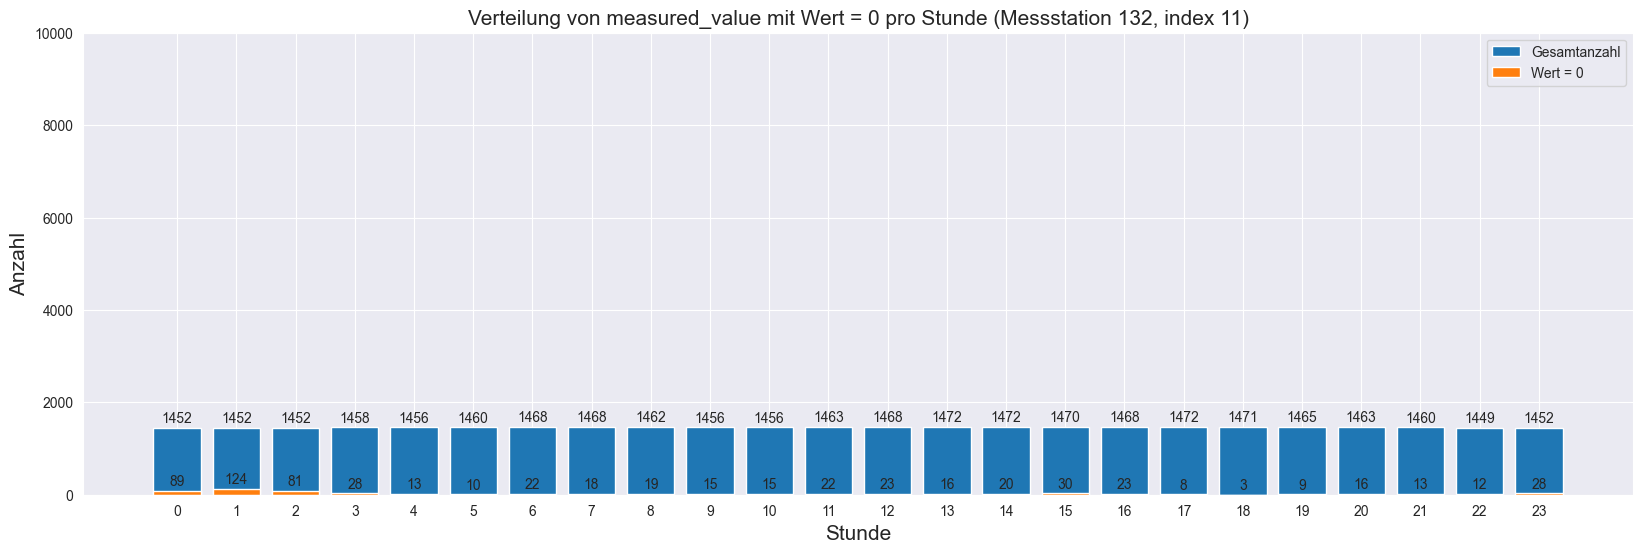

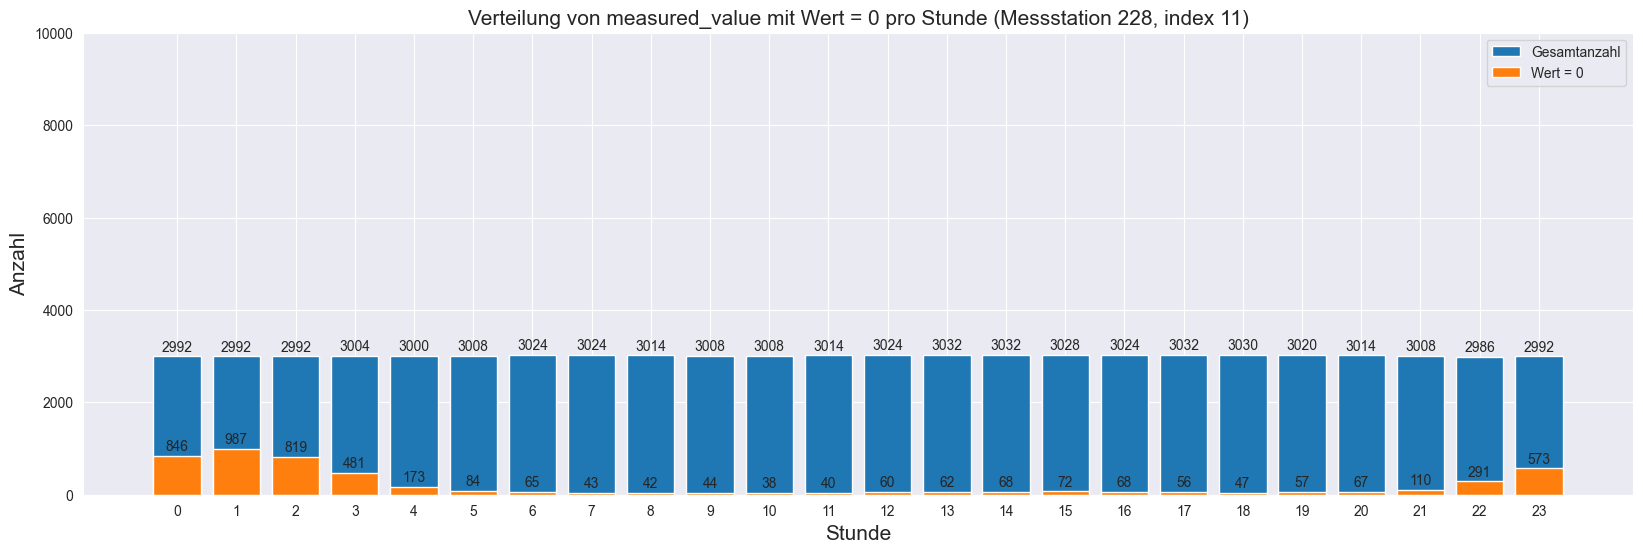

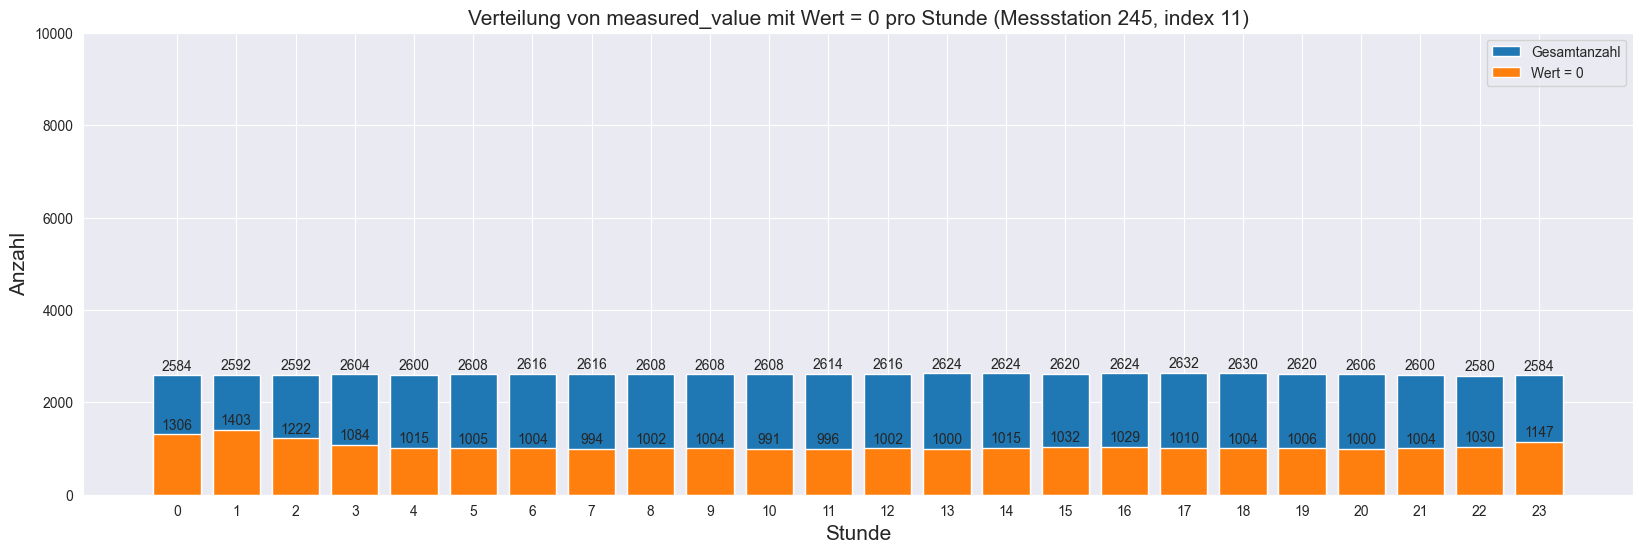

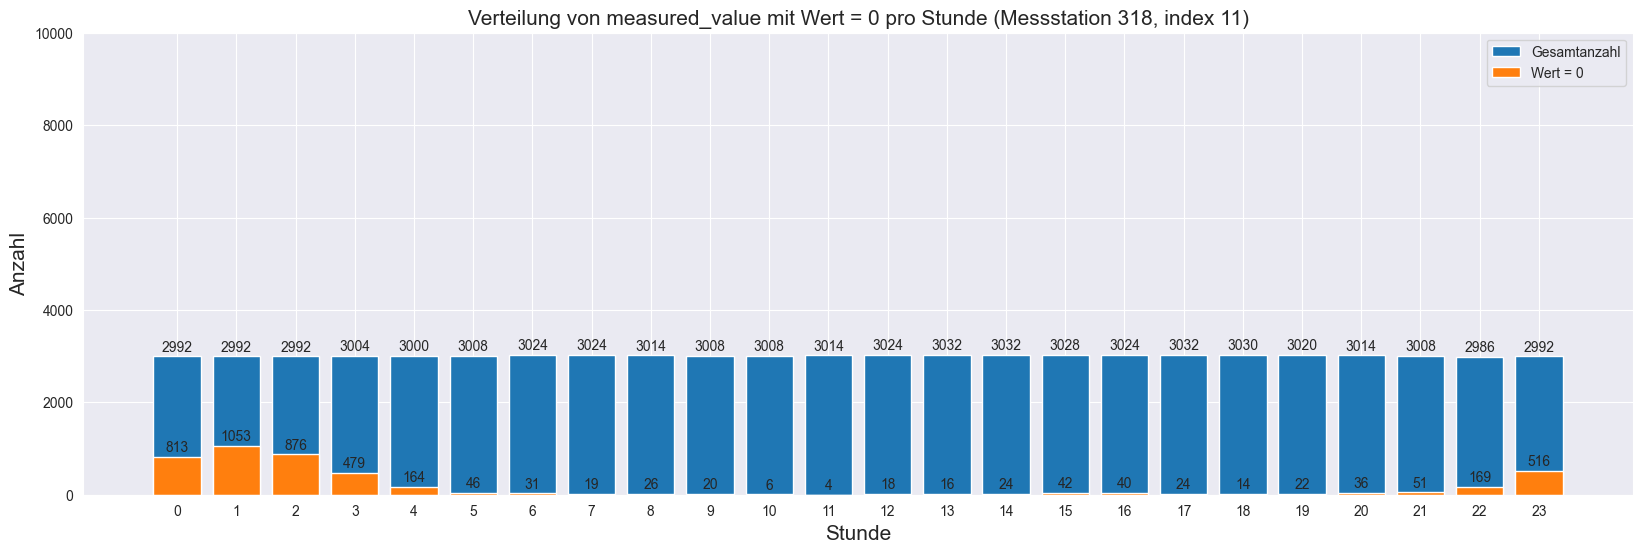

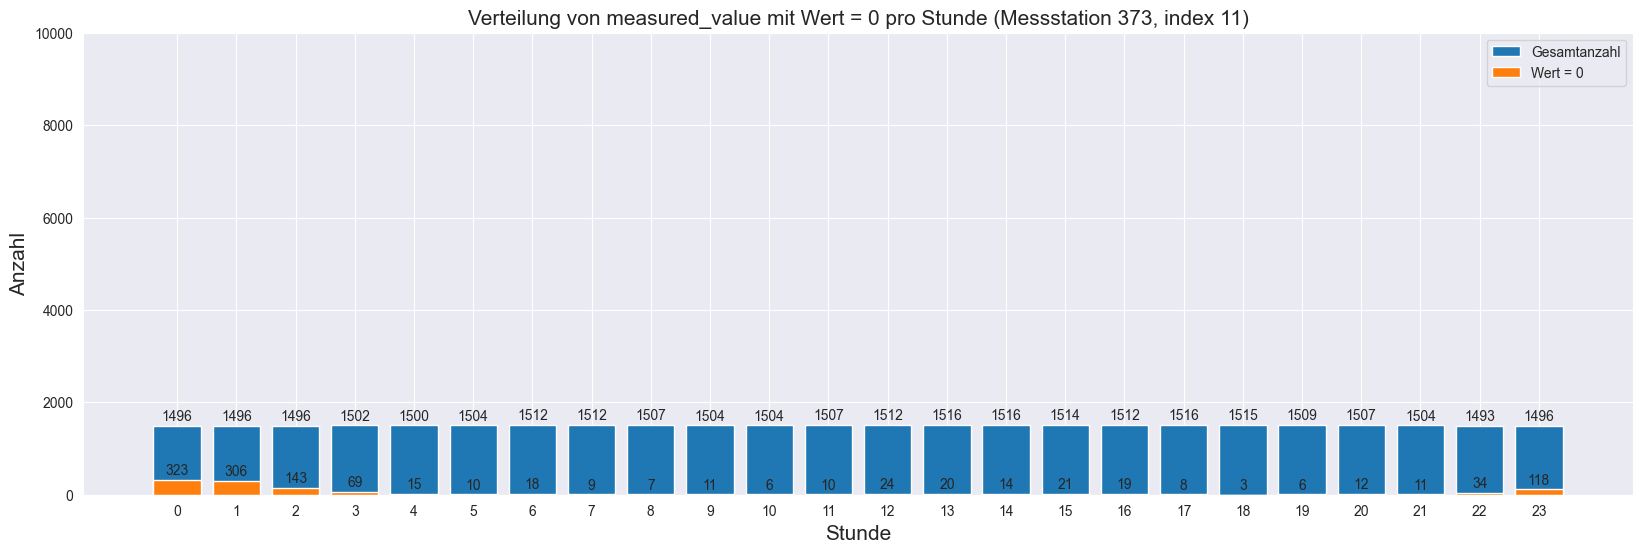

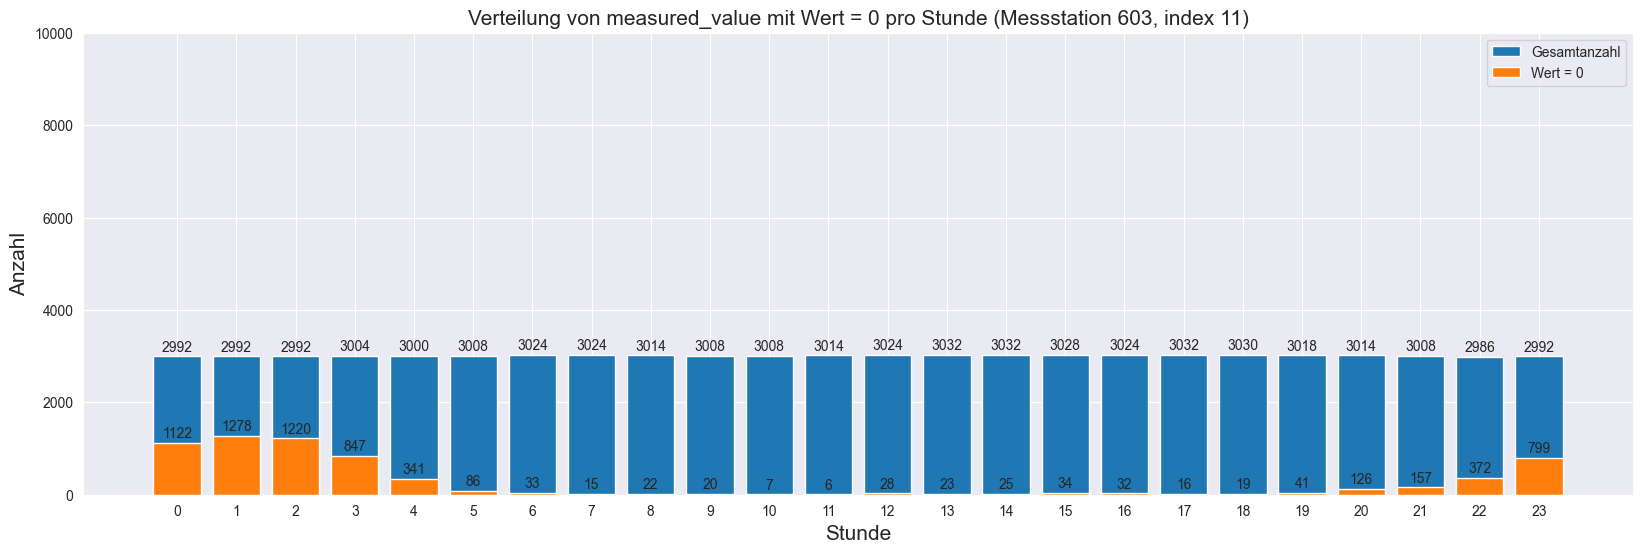

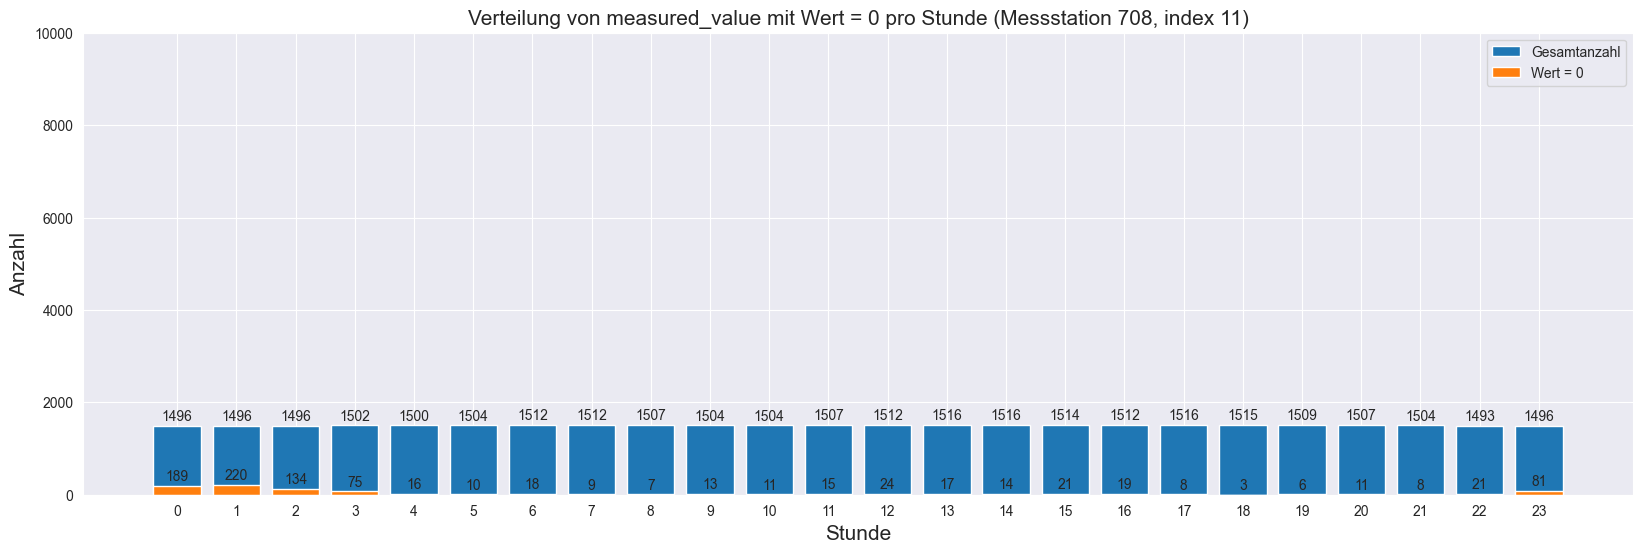

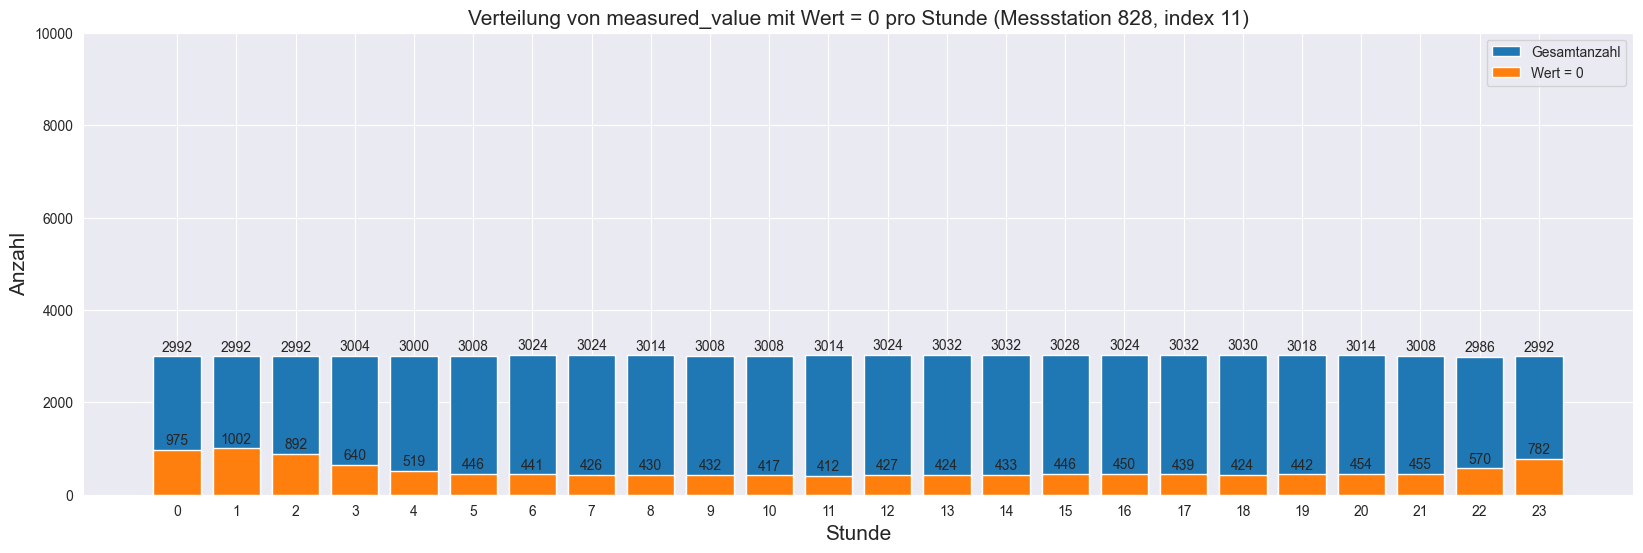

In [16]:
# Konvertiere die Spalte "measurement_time" in das Datumsformat
flow_data['measurement_time'] = pd.to_datetime(flow_data['measurement_time'], format='%Y-%m-%d %H:%M:%S%z', utc=True)
#flow_data['measurement_time'] = pd.to_datetime(flow_data['measurement_time'].str[:10], format='%Y-%m-%d')
#data_flow['Zeitstempel'] = pd.to_datetime(data_flow['Zeitstempel'], format='%Y-%m-%d %H:%M:%S%z', utc=True)

# Filtere die Daten für den Wert 0 in der Spalte "measured_value" und eine bestimmte Kategorie
category = 11  # Hier Kategorie eintragen
zero_values = flow_data[(flow_data['measured_value'] == 0) & (flow_data['index'] == category)]

# Gruppiere die Daten nach "Messstation", "Kategorie" und Stunde und zähle die Anzahl der Werte pro Stunde
hourly_counts = flow_data.groupby(['Messstation', 'index', flow_data['measurement_time'].dt.hour])['measured_value'].size().reset_index(name='Gesamtanzahl')

#Gruppiere die Daten nach "Messstation", "Kategorie" und Stunde und zähle die Anzahl der Werte mit 0 pro Stunde
zero_counts = zero_values.groupby(['Messstation', 'index', zero_values['measurement_time'].dt.hour])['measured_value'].size().reset_index(name='Wert = 0')


for station in flow_data['Messstation'].unique():
    #Filter
    station_hourly_counts = hourly_counts[(hourly_counts['Messstation'] == station) & (hourly_counts['index'] == category)]
    station_zero_counts = zero_counts[(zero_counts['Messstation'] == station) & (zero_counts['index'] == category)]

    #Diagramm
    fig, ax = plt.subplots(figsize=(20, 6))
    ax.bar(station_hourly_counts['measurement_time'], station_hourly_counts['Gesamtanzahl'], label='Gesamtanzahl')
    ax.bar(station_zero_counts['measurement_time'], station_zero_counts['Wert = 0'], label='Wert = 0')

    ax.set_xlabel('Stunde', fontsize=15)
    ax.set_ylabel('Anzahl', fontsize=15)
    ax.set_title(f'Verteilung von measured_value mit Wert = 0 pro Stunde (Messstation {station}, index {category})', fontsize=15)
    ax.set_xticks(station_hourly_counts['measurement_time'])
    ax.set_ylim([0, 10000])
    ax.legend()

    for i, v in enumerate(station_hourly_counts['Gesamtanzahl']):
        ax.text(station_hourly_counts['measurement_time'].iloc[i], v + 50, str(v), ha='center', va='bottom')
    for i, v in enumerate(station_zero_counts['Wert = 0']):
        ax.text(station_zero_counts['measurement_time'].iloc[i], v + 50, str(v), ha='center', va='bottom')

    plt.show()

## Index 21 (LKW)

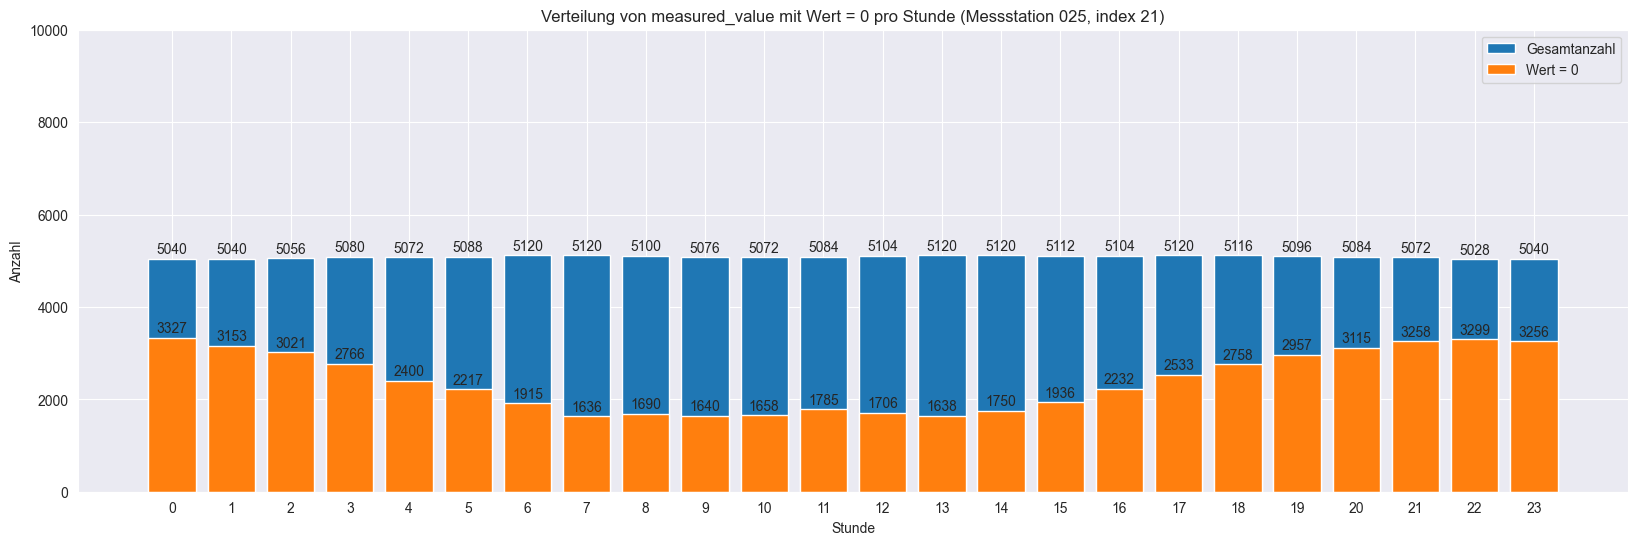

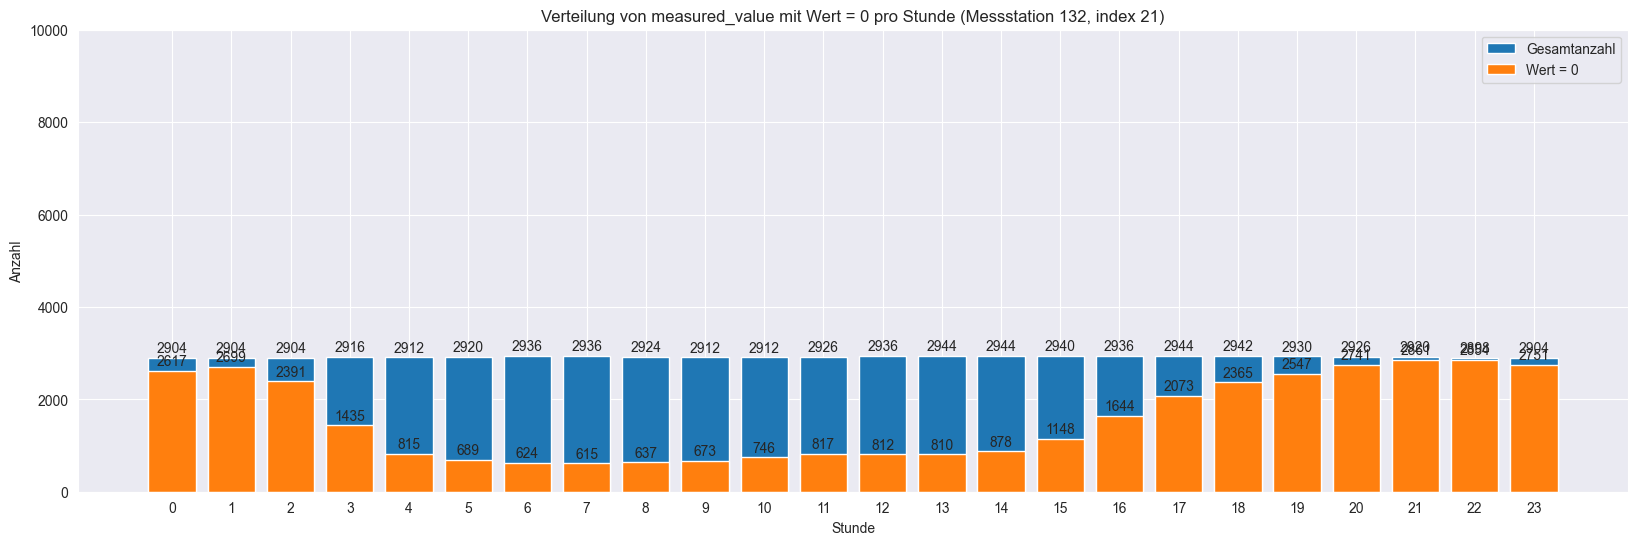

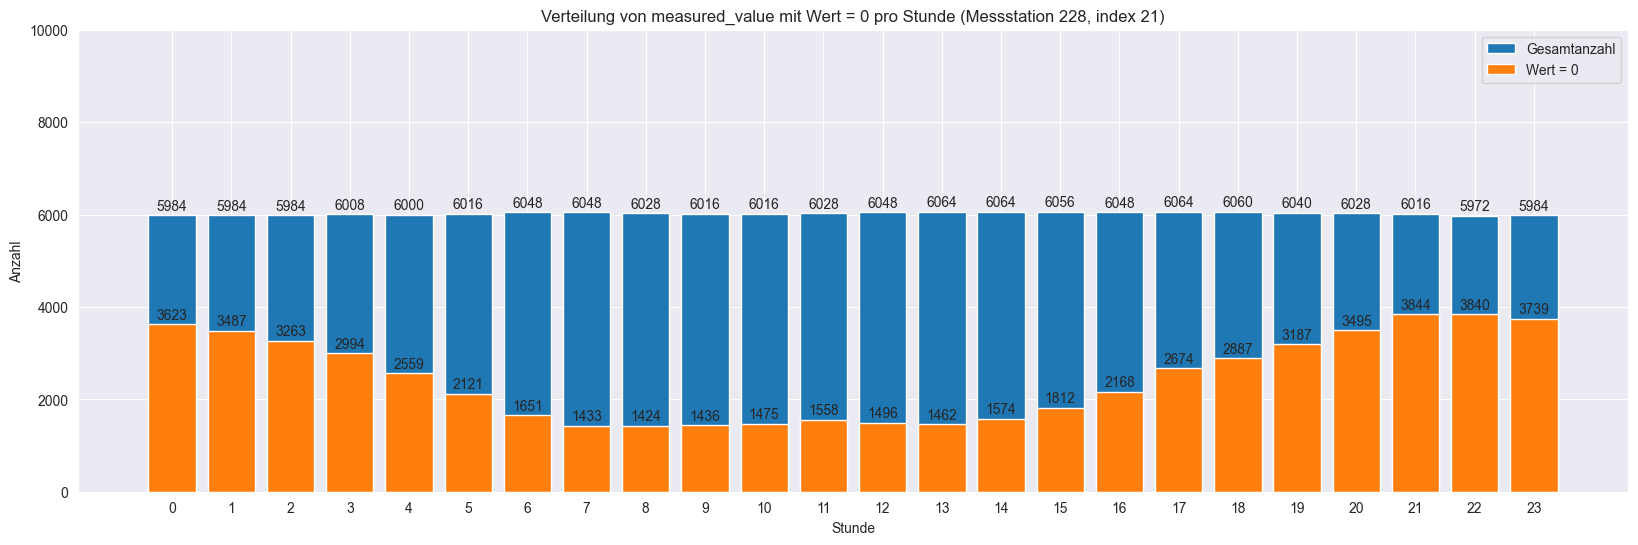

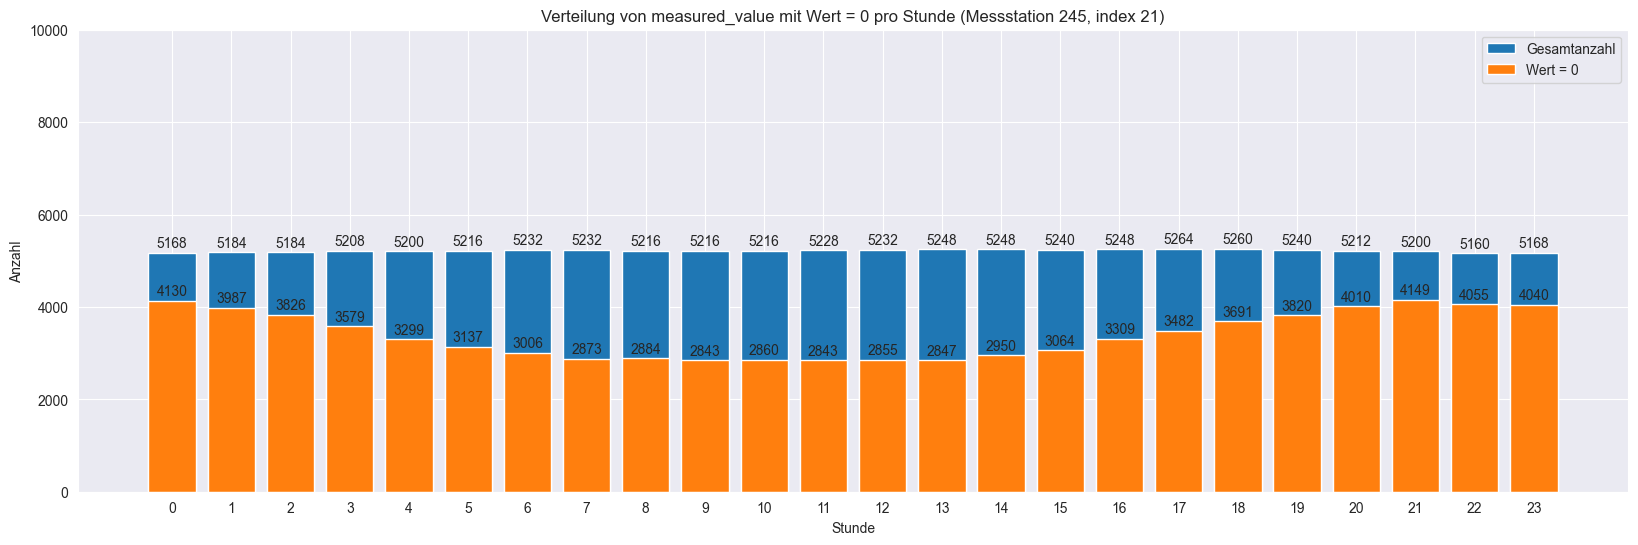

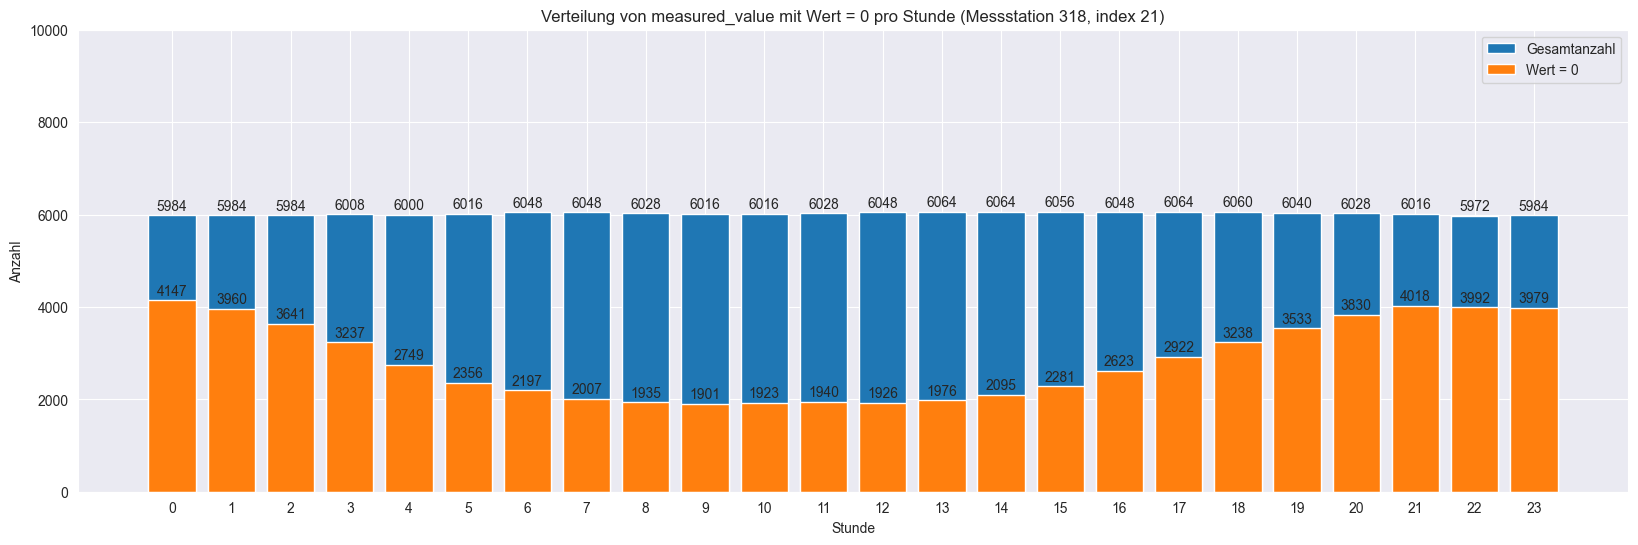

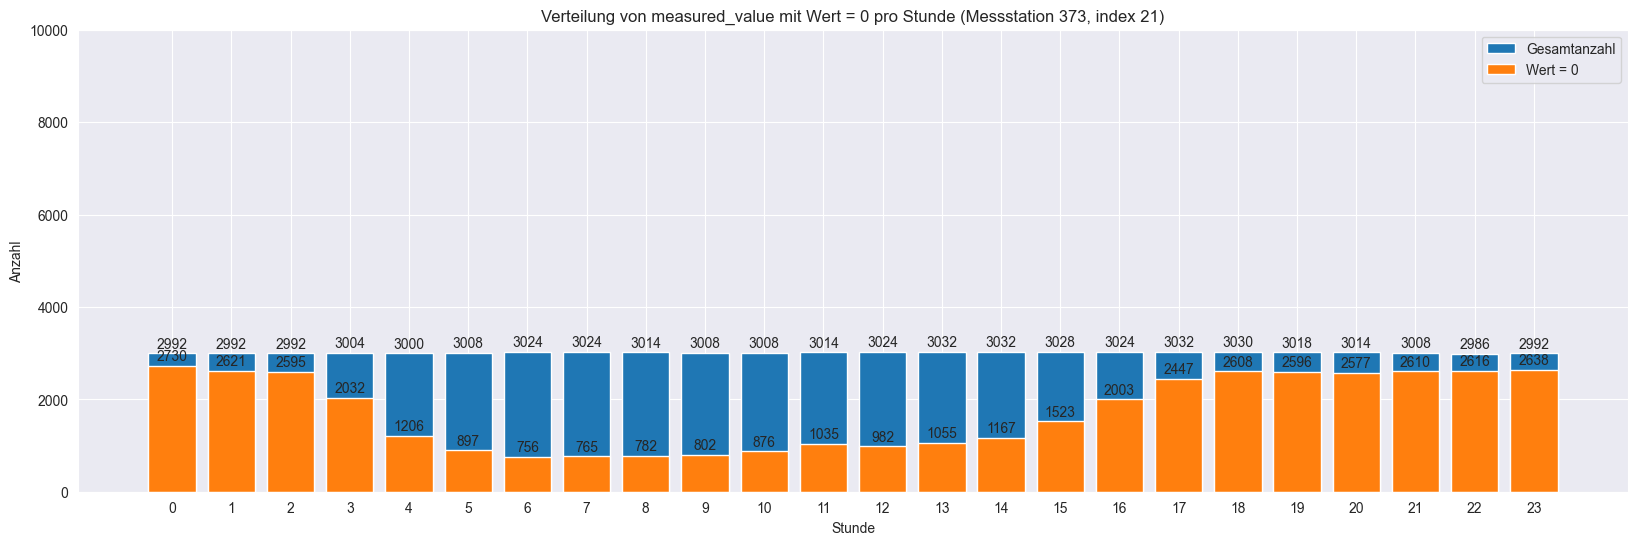

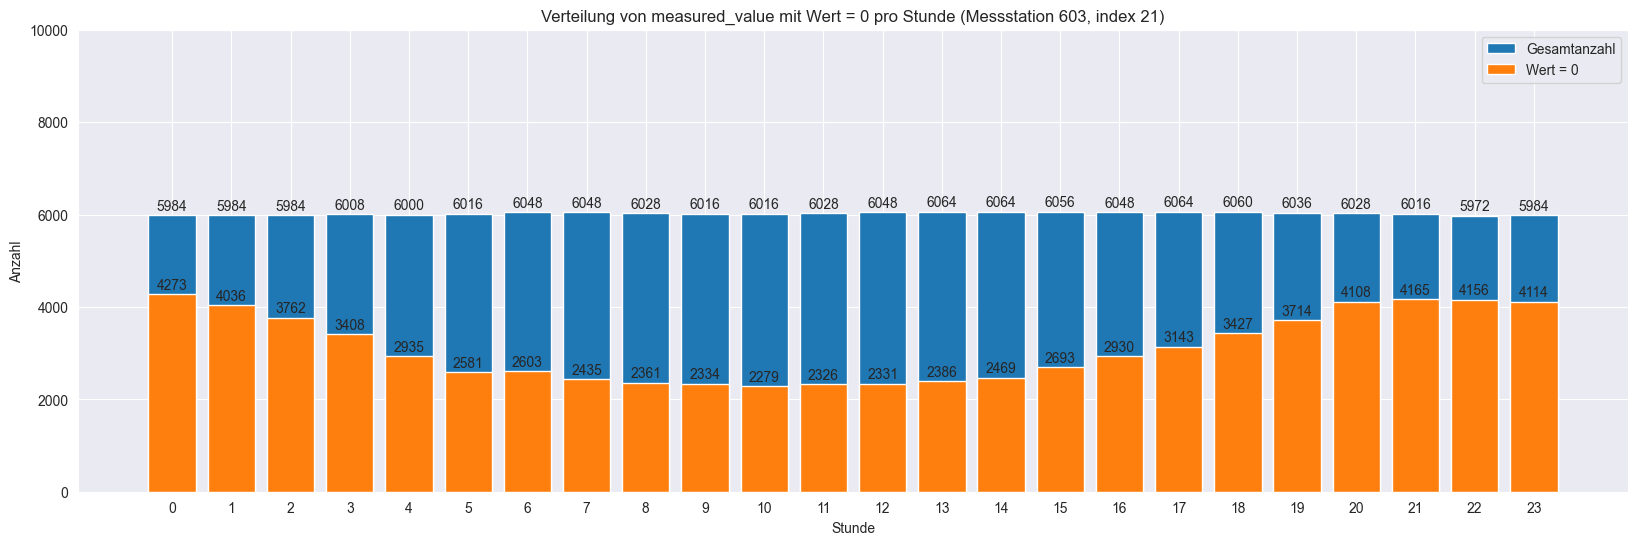

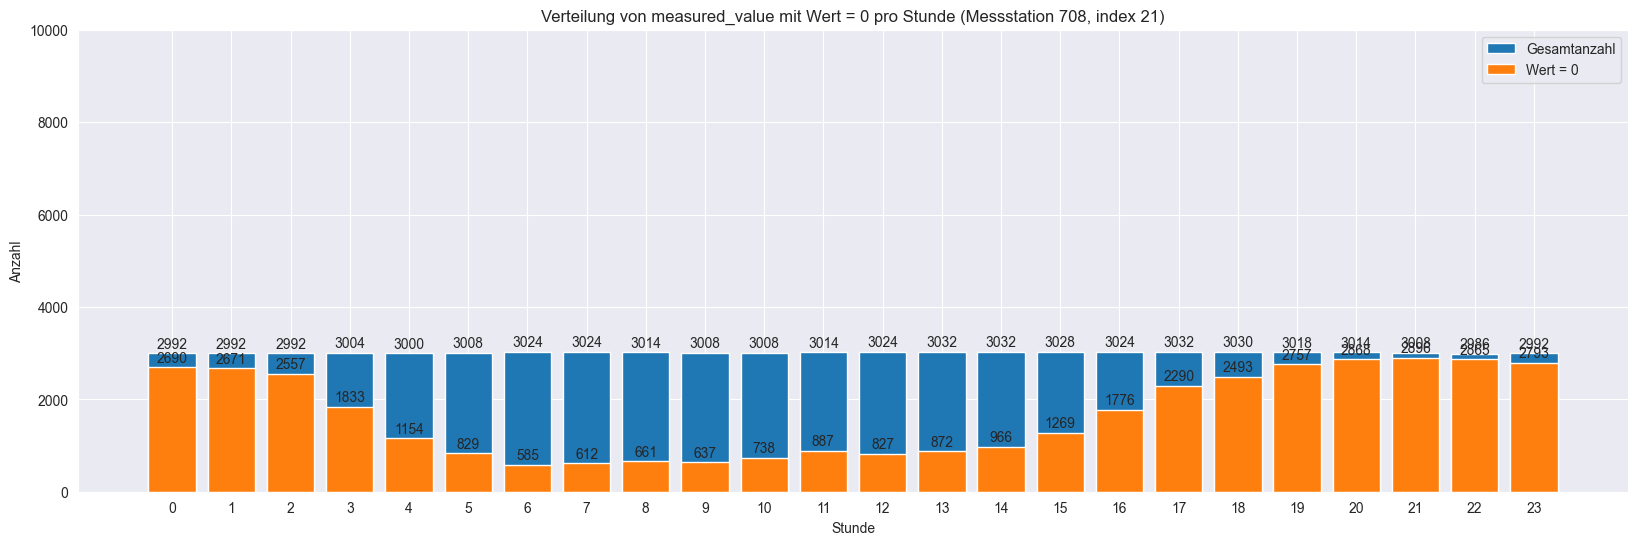

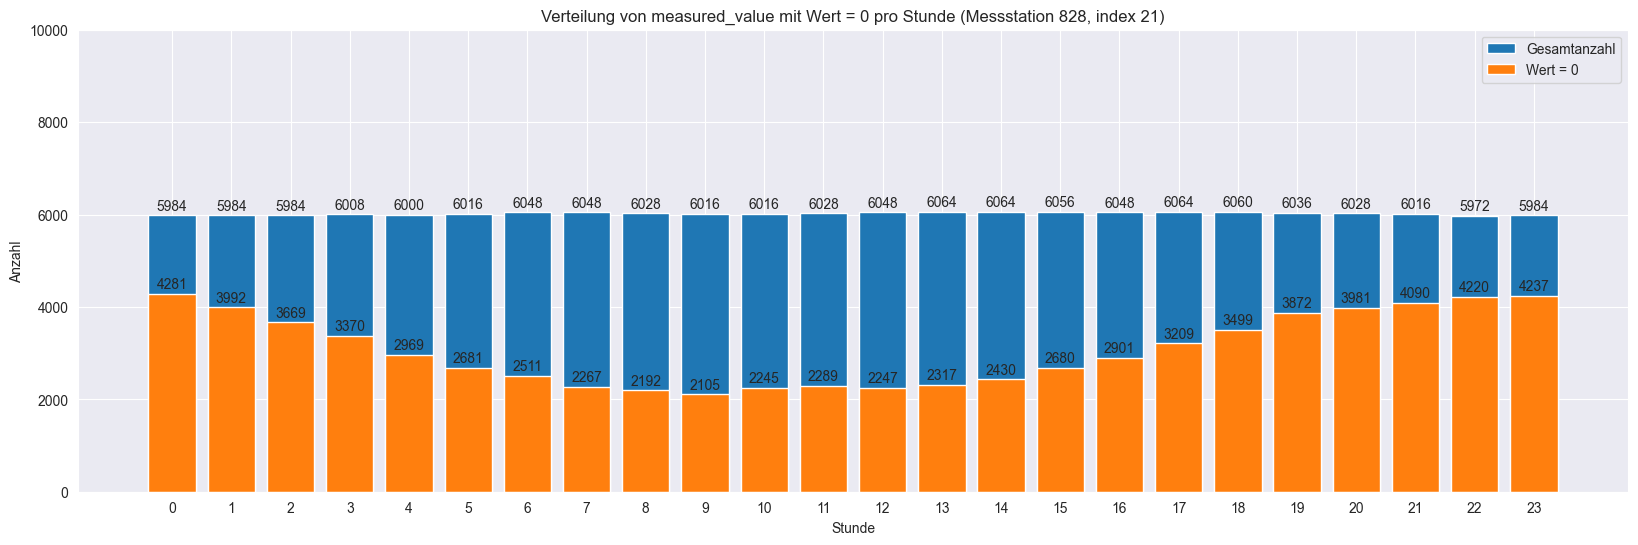

In [104]:
# Konvertiere die Spalte "measurement_time" in das Datumsformat
flow_data['measurement_time'] = pd.to_datetime(flow_data['measurement_time'], format='%Y-%m-%d %H:%M:%S%z')

# Filtere die Daten für den Wert 0 in der Spalte "measured_value" und eine bestimmte Kategorie
category = 21  # Hier Kategorie eintragen
zero_values = flow_data[(flow_data['measured_value'] == 0) & (flow_data['index'] == category)]

# Gruppiere die Daten nach "Messstation", "Kategorie" und Stunde und zähle die Anzahl der Werte pro Stunde
hourly_counts = flow_data.groupby(['Messstation', 'index', flow_data['measurement_time'].dt.hour])['measured_value'].size().reset_index(name='Gesamtanzahl')

# Gruppiere die Daten nach "Messstation", "Kategorie" und Stunde und zähle die Anzahl der Werte mit 0 pro Stunde
zero_counts = zero_values.groupby(['Messstation', 'index', zero_values['measurement_time'].dt.hour])['measured_value'].size().reset_index(name='Wert = 0')

# Iteriere über jede eindeutige "Messstation"
for station in flow_data['Messstation'].unique():
    # Filtere die Daten für die aktuelle "Messstation" und "index"
    station_hourly_counts = hourly_counts[(hourly_counts['Messstation'] == station) & (hourly_counts['index'] == category)]
    station_zero_counts = zero_counts[(zero_counts['Messstation'] == station) & (zero_counts['index'] == category)]

    # Erstelle ein Bar-Diagramm zur Darstellung der Verteilung der Werte mit 0 und der Gesamtanzahl pro Stunde
    fig, ax = plt.subplots(figsize=(20, 6))
    ax.bar(station_hourly_counts['measurement_time'], station_hourly_counts['Gesamtanzahl'], label='Gesamtanzahl')
    ax.bar(station_zero_counts['measurement_time'], station_zero_counts['Wert = 0'], label='Wert = 0')

    ax.set_xlabel('Stunde', fontsize=15)
    ax.set_ylabel('Anzahl', fontsize=15)
    ax.set_title(f'Verteilung von measured_value mit Wert = 0 pro Stunde (Messstation {station}, index {category})', fontsize=15)
    ax.set_xticks(station_hourly_counts['measurement_time'])
    ax.set_ylim([0, 10000])  # Einheitliche Skala für die y-Achse
    ax.legend()
    # Zeige die Werte der Balken an
    for i, v in enumerate(station_hourly_counts['Gesamtanzahl']):
        ax.text(station_hourly_counts['measurement_time'].iloc[i], v + 50, str(v), ha='center', va='bottom')
    for i, v in enumerate(station_zero_counts['Wert = 0']):
        ax.text(station_zero_counts['measurement_time'].iloc[i], v + 50, str(v), ha='center', va='bottom')


    # Zeige das Diagramm an
    plt.show()

## Index 0

In [1]:
# Konvertiere die Spalte "measurement_time" in das Datumsformat
flow_data['measurement_time'] = pd.to_datetime(flow_data['measurement_time'], format='%Y-%m-%d %H:%M:%S%z')

# Filtere die Daten für den Wert 0 in der Spalte "measured_value" und eine bestimmte Kategorie
category = 0  # Hier Kategorie eintragen
zero_values = flow_data[(flow_data['measured_value'] == 0) & (flow_data['index'] == category)]

# Gruppiere die Daten nach "Messstation", "Kategorie" und Stunde und zähle die Anzahl der Werte pro Stunde
hourly_counts = flow_data.groupby(['Messstation', 'index', flow_data['measurement_time'].dt.hour])['measured_value'].size().reset_index(name='Gesamtanzahl')

# Gruppiere die Daten nach "Messstation", "Kategorie" und Stunde und zähle die Anzahl der Werte mit 0 pro Stunde
zero_counts = zero_values.groupby(['Messstation', 'index', zero_values['measurement_time'].dt.hour])['measured_value'].size().reset_index(name='Wert = 0')

# Iteriere über jede eindeutige "Messstation"
for station in flow_data['Messstation'].unique():
    # Filtere die Daten für die aktuelle "Messstation" und "index"
    station_hourly_counts = hourly_counts[(hourly_counts['Messstation'] == station) & (hourly_counts['index'] == category)]
    station_zero_counts = zero_counts[(zero_counts['Messstation'] == station) & (zero_counts['index'] == category)]

    # Erstelle ein Bar-Diagramm zur Darstellung der Verteilung der Werte mit 0 und der Gesamtanzahl pro Stunde
    fig, ax = plt.subplots(figsize=(20, 6))
    ax.bar(station_hourly_counts['measurement_time'], station_hourly_counts['Gesamtanzahl'], label='Gesamtanzahl')
    ax.bar(station_zero_counts['measurement_time'], station_zero_counts['Wert = 0'], label='Wert = 0')

    ax.set_xlabel('Stunde', fontsize=12)
    ax.set_ylabel('Anzahl', fontsize=12)
    ax.set_title(f'Verteilung von measured_value mit Wert = 0 pro Stunde (Messstation {station}, index {category})')
    ax.set_xticks(station_hourly_counts['measurement_time'])
    ax.set_ylim([0, 10000])  # Einheitliche Skala für die y-Achse
    ax.legend()
    # Zeige die Werte der Balken an
    for i, v in enumerate(station_hourly_counts['Gesamtanzahl']):
        ax.text(station_hourly_counts['measurement_time'].iloc[i], v + 50, str(v), ha='center', va='bottom')
    for i, v in enumerate(station_zero_counts['Wert = 0']):
        ax.text(station_zero_counts['measurement_time'].iloc[i], v + 50, str(v), ha='center', va='bottom')


    # Zeige das Diagramm an
    plt.show()

NameError: name 'pd' is not defined

### Analyse des Index 0, ob fälschlicherweise Daten nicht zugeordnet werden konnten

In [17]:
# Filtere die Daten für "index" 0
filtered_data = flow_data[flow_data['index'] == 0]

# Gruppiere die Daten nach "Messstation" und berechne die Summe der "measured_value"
sum_per_station = filtered_data.groupby('Messstation')['measured_value'].sum()

# Zeige die Summen pro "Messstation" an
print(sum_per_station)

Messstation
025    0
132    0
228    0
245    0
318    0
373    0
603    0
708    0
828    0
Name: measured_value, dtype: int64


alle Inputs mit Wert 0 sind leer